File 'election_data.csv' created with election data.

Party with the highest number of seats in each state:
            State Party
0  Madhya Pradesh   BJP
4       Rajasthan   BJP


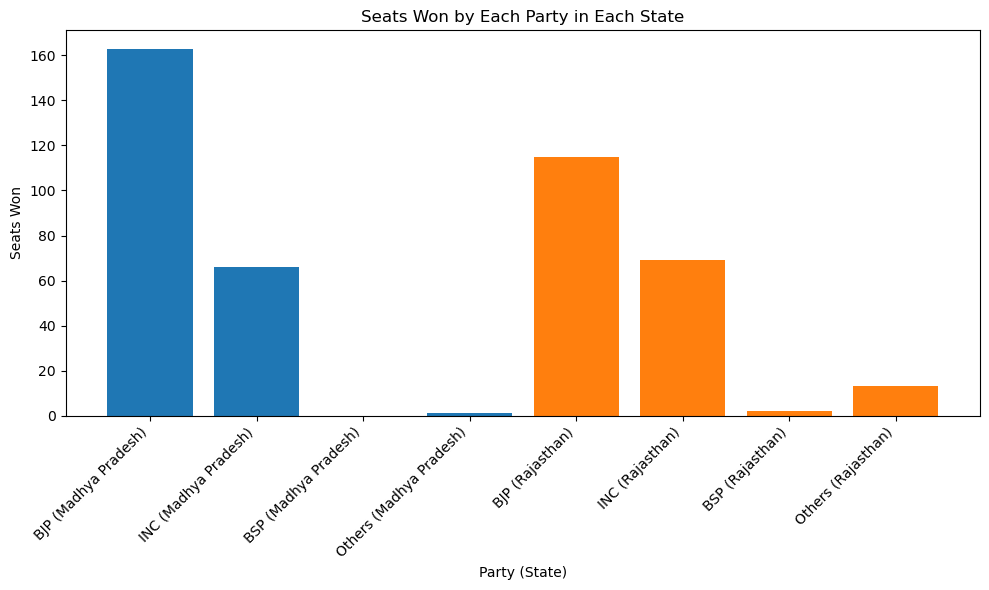

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Election data
data = [
    ["Madhya Pradesh", "BJP", 163, 230, 72.1],
    ["Madhya Pradesh", "INC", 66, 230, 72.1],
    ["Madhya Pradesh", "BSP", 0, 230, 72.1],
    ["Madhya Pradesh", "Others", 1, 230, 72.1],
    ["Rajasthan", "BJP", 115, 200, 74.2],
    ["Rajasthan", "INC", 69, 200, 74.2],
    ["Rajasthan", "BSP", 2, 200, 74.2],
    ["Rajasthan", "Others", 13, 200, 74.2],
]

columns = ["State", "Party", "Seats_Won", "Total_Seats", "Voter_Turnout (%)"]

filename = "election_data.csv"

try:
    # Check if file exists
    if not os.path.exists(filename):
        # Write data to CSV
        pd.DataFrame(data, columns=columns).to_csv(filename, index=False)
        print(f"File '{filename}' created with election data.")
    else:
        print(f"File '{filename}' already exists.")

    # Read data into DataFrame
    df = pd.read_csv(filename)

    # Calculate Seats_Percentage
    df["Seats_Percentage"] = (df["Seats_Won"] / df["Total_Seats"]) * 100

    # Determine the party with the highest number of seats in each state
    highest_party = df.loc[df.groupby("State")["Seats_Won"].idxmax()]
    print("\nParty with the highest number of seats in each state:")
    print(highest_party[["State", "Party"]])

    # Create a bar chart for seats won by each party in each state
    plt.figure(figsize=(10, 6))
    for state, state_data in df.groupby("State"):
        plt.bar(state_data["Party"] + " (" + state + ")", state_data["Seats_Won"], label=state)

    plt.title("Seats Won by Each Party in Each State")
    plt.xlabel("Party (State)")
    plt.ylabel("Seats Won")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("The file could not be found.")
except pd.errors.EmptyDataError:
    print("The file is empty or corrupted.")
except Exception as e:
    print(f"An error occurred: {e}")
